# Spark Funds Investments Analysis

## Objective : 

1.) __Business Objective:__
- To understand the global trends in investments so that the company can take the investment decisions effectively.
    
2.) __Goals for data analysis:__

- `Investment type analysis` : Typical investment amounts in the venture, seed, angel, private equity etc.
- `Country analysis`: Identifying the countries which have been the most heavily invested in the past.
- `Sector analysis`: Understanding the distribution of investments across the eight main sectors.
    

- __Spark Funds has two minor constraints for investments:__

    1.) It wants to invest between 5 to 15 million USD per round of investment

    2.) It wants to invest only in English-speaking countries because of the ease of communication with the companies it would       invest in.
    

- __Source of data__ :Real investment data from <font color = blue>**crunchbase.com**</font>


# Step 1 : Data Understanding and Preparation

In [1]:
#import pandas and numpy
import pandas as pd
import numpy as np

### Load given datasets

__companies details__

In [2]:
#import companies data set
# encoding='latin1' to solve UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte
companies=pd.read_csv('companies.csv',encoding='latin1') 

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


__rounds2 details__

In [4]:
rounds2=pd.read_csv('rounds2.csv', encoding='latin1') 

In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


__mapping details__

In [6]:
mapping=pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


### Understand the Data Set 

In [7]:
#Convert all entries in 'company_permalink' to lower case for merging
companies['permalink']=companies['permalink'].str.lower()
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

__1. How many unique companies are present in rounds2?__

In [8]:
rounds2_unique=rounds2['company_permalink'].nunique()
print("Unqiue companies in rounds2 : {}".format(rounds2_unique))

#or, We can also get number of unique columns with rounds2.describe(include='all')

Unqiue companies in rounds2 : 66370


__2.How many unique companies are present in companies?__

In [9]:
comapnies_unique=companies['permalink'].nunique()
print("Unique comapny names in comapnies : {}".format(comapnies_unique))

#or, We can also get number of unique columns with companies.describe(include='all')

Unique comapny names in comapnies : 66368


__3.Merge the rounds2 and companies data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame__

In [10]:
#Join companies and round table to get the master_frame
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")

In [11]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [12]:
#To check the shape of master_frame
master_frame.shape

(114949, 16)

In [13]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

# Step 2 :Data cleaning

In [14]:
#Get the number of missing values for each column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [15]:
# calculate % missing values of total number of values rounded to 2 decimals
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [16]:
# Remove the rows entries in name column as NaN
master_frame=master_frame[~(master_frame['name'].isnull())]

In [17]:
# Remove the rows entries in name column as NaN
master_frame=master_frame[~(master_frame['status']=='closed')]

In [18]:
#To check remaining null values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         77269
funded_at                      0
raised_amount_usd          18319
permalink                      0
name                           0
homepage_url                5313
category_list               2383
status                         0
country_code                6829
state_code                  8935
region                      8195
city                        8192
founded_at                 17843
dtype: int64

In [19]:
#condition to check country_code with NaN values
a=(master_frame['country_code'].isnull())

#condtion to check state_code with NaN values
b=(master_frame['state_code'].isnull())

#condtion to check region with NaN values
c=(master_frame['region'].isnull())

#condtion to check city with NaN values
d=(master_frame['city'].isnull())

#Remove the rows with missing country_code ,state_code,region and city by combining all above conditions

master_frame=master_frame[~(a & b & c & d)]


In [20]:
#Calculate % of missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.13
funded_at                   0.00
raised_amount_usd          16.21
permalink                   0.00
name                        0.00
homepage_url                4.24
category_list               1.42
status                      0.00
country_code                0.00
state_code                  2.12
region                      1.37
city                        1.37
founded_at                 15.15
dtype: float64

In [21]:
#raised_amount_usd column still has 16.21% of missing values
#that we will be using for our analysis so it NaN values in that column can be removed

master_frame=master_frame[~master_frame["raised_amount_usd"].isnull()]

In [22]:
#Again check for the % of missing values
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.75
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.74
category_list               0.52
status                      0.00
country_code                0.00
state_code                  1.94
region                      1.31
city                        1.31
founded_at                 14.62
dtype: float64

Furthermore columns funding_round_code ,founded_at and homepage_url have significant number of missing values and will not be used for our analysis so we can remove these columns

In [23]:
master_frame=master_frame.drop("funding_round_code",axis=1)
master_frame=master_frame.drop("homepage_url",axis=1)
master_frame=master_frame.drop("founded_at",axis=1)

In [24]:
#Remove Null values from category_list as this required for our analysis
master_frame=master_frame[~master_frame["category_list"].isnull()]

In [25]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.93
region                     1.31
city                       1.30
dtype: float64

Now we have got the required data for analysis and the percentage of missing values is also very low.

In [26]:
#Check the shape of master_frame available for analysis
master_frame.shape

(82846, 13)

In [27]:
#peecentage of rows left after cleaning

round(100*(len(master_frame.index)/114942),2)

72.08

# Step 3 : Data Analysis and Visualiztaion

### Funding Type Analysis

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 

Spark Funds wants to choose one of these four investment types for each potential investment they will make.

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity).


In [28]:
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Spark Funds wants to choose one of the four below mentioned investment types for each potential investment they will make. 
- seed
- angle
- venture
- private_equity
    

In [29]:
#Check for all types of investment types available
master_frame["funding_round_type"].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

14 unqiue funding round type are available

#### Since spark funds wants to invest in seed,angel,venture,private_equity funding_round_type. we will filter our dataframe based on those 4 types

In [30]:
master_frame=master_frame[master_frame["funding_round_type"].isin(['seed','angel','venture','private_equity'])]

In [31]:
#Check for all types of investment types available now in master_frame
master_frame["funding_round_type"].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

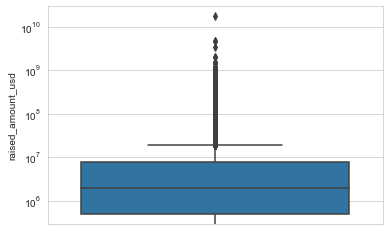

In [32]:
#Visualize the raised amount in USD on boxplot
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [33]:
master_frame.groupby("funding_round_type")["raised_amount_usd"].median().sort_values(ascending=False)

funding_round_type
private_equity    21000000.0
venture            5000000.0
angel               418856.0
seed                313837.0
Name: raised_amount_usd, dtype: float64

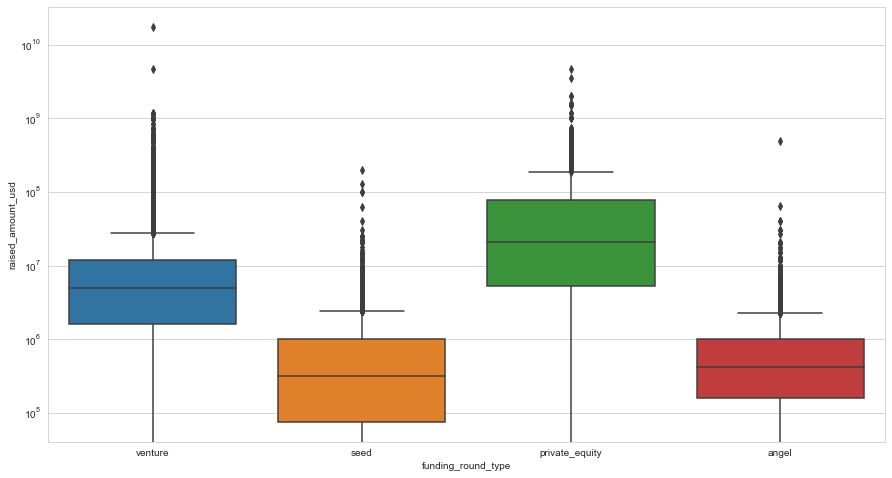

In [34]:
# boxplot between variable across various funding round type
plt.figure(figsize=(15, 8))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

In [35]:
# averages investment across funding_round_type
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)


funding_round_type
private_equity    7.597602e+07
venture           1.189396e+07
angel             9.971881e+05
seed              7.632798e+05
Name: raised_amount_usd, dtype: float64

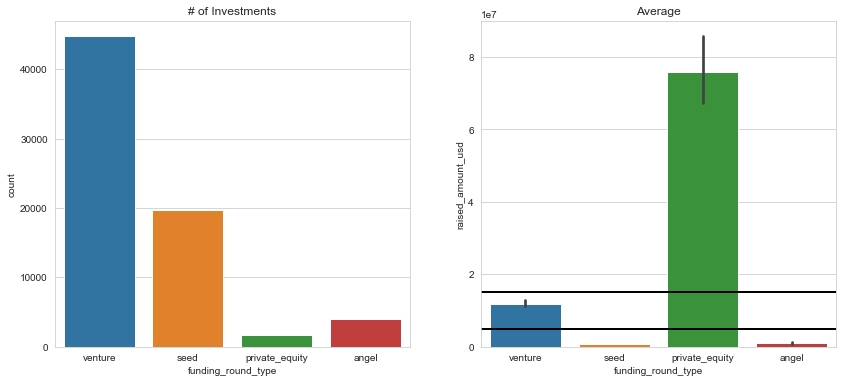

In [36]:
# Average and number on ivestments across different funding category

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

### After seeing the above barplot and countplot we can see the Venture type Falls between 5 to 15 million USD and most number of investment are in that category. So Clearly, Venture type of investment is the ideal investment type for Spark Funds. 

## Country analysis

Now we know the type of investment suited for Spark Funds, let's narrow down the countries

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)


In [37]:
#First lets purge our data to only venture type as thats the type suitable for spark funds
venture_invest=master_frame[master_frame["funding_round_type"]=='venture']

In [38]:
venture_invest["funding_round_type"].unique()

array(['venture'], dtype=object)

In [39]:
venture_invest["country_code"].describe()

count     44748
unique       97
top         USA
freq      33620
Name: country_code, dtype: object

### Spark Funds wants to see the top nine countries which have received the highest total funding

In [40]:
venture_invest.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    3.983246e+11
CHN    3.864227e+10
GBR    1.814229e+10
IND    1.392025e+10
CAN    8.747168e+09
FRA    6.742609e+09
ISR    6.484357e+09
DEU    6.021103e+09
JPN    3.156202e+09
Name: raised_amount_usd, dtype: float64

In [41]:
# Create a new data frame top9 with the list of countries with highest funding

top9 = venture_invest[venture_invest['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [42]:
top9['country_code'].unique()

array(['IND', 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'JPN', 'DEU', 'ISR'],
      dtype=object)

### Identify the top three English-speaking countries in the data frame top9

**Top three English speaking countries:**
1. USA
2. GBR
3. IND

## sector analysis

Category list is a list of multiple sub-sectors separated by a pipe (vertical bar |).

After discussing with the CEO we come up with the business rule that the first string before the vertical bar will be considered the primary sector.


In [43]:
#Extract the primary sector of each category list from the category_list column
top9['primary_sector'] =top9['category_list'].apply(lambda x: x.split('|')[0])
top9['primary_sector'] = top9['primary_sector'].str.lower()

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,curated web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics


In [45]:
top9.shape

(41349, 14)

In [46]:
# Now create a new data frame with only these 3 countires data for furthur sector wise analysis
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    3.983246e+11
GBR    1.814229e+10
IND    1.392025e+10
Name: raised_amount_usd, dtype: float64

**Before further analysis for sectors lets see the mapping dataframe**

In [47]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [48]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


### There are eight main sectors excluding Blanks

In [49]:
#Remove all the null values from mapping data frame

mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
mapping.head(10)

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [50]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 8 to 6167
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   variable       688 non-null    object
 2   value          688 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [51]:
mapping = mapping.drop('value', axis=1)
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
mapping['primary_sector'] = mapping['primary_sector'].str.lower()

In [52]:
mapping.head()

,primary_sector,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [53]:
top3_english.shape

(36307, 14)

###  map each primary sector to one of the eight main sectors 

In [54]:
top3_english = pd.merge(top3_english, mapping, how='left', on='primary_sector', indicator=True)
top3_english.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment,both
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,NaN,left_only
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,NaN,left_only
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,NaN,left_only
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging",both


In [55]:
top3_english.shape

(36307, 16)

In [56]:
#Sectors in top3_english dataframe

left_only = top3_english[top3_english['_merge'] != 'both']
left_only.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector,_merge
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,NaN,left_only
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,NaN,left_only
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,NaN,left_only
12,/organization/100plus,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,/organization/100plus,100Plus,Analytics,acquired,USA,CA,SF Bay Area,San Francisco,analytics,NaN,left_only
40,/organization/1world-online,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,CA,SF Bay Area,San Jose,analytics,NaN,left_only


In [57]:
#Unique primary sectors in left_only
left_only['primary_sector'].unique()

array(['analytics', 'nanotechnology', 'business analytics', 'finance',
       'contact management', 'financial services', 'career management',
       'cloud management', 'big data analytics', 'finance technology',
       'document management', 'digital signage', 'energy management',
       'lead management', 'event management', 'it management', 'cannabis',
       'investment management', 'knowledge management',
       'identity management', 'personalization', 'natural gas uses',
       'alternative medicine', 'natural language processing',
       'intellectual asset management', 'risk management',
       'adaptive equipment', 'supply chain management',
       'innovation management', 'project management', 'specialty retail',
       'biotechnology and semiconductor', 'waste management',
       'educational games', 'rapidly expanding',
       'digital rights management', 'governance', 'professional services',
       'mobile analytics', 'journalism', 'navigation',
       'property managem

In [58]:
#Unique primary sectors in mapping datframe
mapping['primary_sector'].unique()

array(['adventure travel', 'aerospace', 'auto', 'automated kiosk',
       'automotive', 'bicycles', 'boating industry', 'cad', 'cars',
       'design', 'designers', 'drones', 'electric vehicles', 'fuels',
       'heavy industry', 'industrial automation', 'limousines', 'soccer',
       'sporting goods', 'sports', 'transportation',
       'unmanned air systems', nan, 'air pollution control',
       'aquaculture', 'bio-pharm', 'biofuels', 'bioinformatics',
       'biomass power generation', 'biometrics', 'biotechnology',
       'bitcoin', 'carbon', 'chemicals', 'clean energy',
       'clean technology', 'clean technology it', 'commercial solar',
       'commodities', 'concentrated solar power', 'disruptive models',
       'early-stage technology', 'energy', 'energy efficiency',
       'energy it', 'energy ma0gement', 'energy storage',
       'environmental innovation', 'fertility', 'fuel cells',
       'funeral industry', 'gas', 'green', 'green consumer goods',
       'home & garden', 'ho

**We can see above that 'na' is misspelt as 0 at many places. eg. a0lytics ,0tural etc.**

In [59]:
#Replace '0' with 'na'
mapping['primary_sector'] = mapping.primary_sector.str.replace('0','na')

In [60]:
mapping['primary_sector'].unique()

array(['adventure travel', 'aerospace', 'auto', 'automated kiosk',
       'automotive', 'bicycles', 'boating industry', 'cad', 'cars',
       'design', 'designers', 'drones', 'electric vehicles', 'fuels',
       'heavy industry', 'industrial automation', 'limousines', 'soccer',
       'sporting goods', 'sports', 'transportation',
       'unmanned air systems', nan, 'air pollution control',
       'aquaculture', 'bio-pharm', 'biofuels', 'bioinformatics',
       'biomass power generation', 'biometrics', 'biotechnology',
       'bitcoin', 'carbon', 'chemicals', 'clean energy',
       'clean technology', 'clean technology it', 'commercial solar',
       'commodities', 'concentrated solar power', 'disruptive models',
       'early-stage technology', 'energy', 'energy efficiency',
       'energy it', 'energy management', 'energy storage',
       'environmental innovation', 'fertility', 'fuel cells',
       'funeral industry', 'gas', 'green', 'green consumer goods',
       'home & garden', 'h

In [61]:
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english = pd.merge(top3_english, mapping, how='left', on='primary_sector', indicator=True)
left_only = top3_english[top3_english['_merge'] != 'both']
left_only['primary_sector'].sort_values(ascending=True).unique()

array(['adaptive equipment', 'biotechnology and semiconductor',
       'enterprise 2.0', 'greentech', 'natural gas uses',
       'rapidly expanding', 'specialty retail'], dtype=object)

In [62]:
mapping['primary_sector'].sort_values(ascending=True).unique

<bound method Series.unique of 3441                  3d
3442         3d printing
3443       3d technology
5508          accounting
2757    active lifestyle
              ...       
2748    wine and spirits
2749            wireless
5502               women
5503        young adults
688                  NaN
Name: primary_sector, Length: 688, dtype: object>

In [63]:
left_only.shape

(11, 16)

In [64]:
#We will keep the sectors which are there in both and remove those are only in left_only as we are not able to map them.
top3_english = top3_english[top3_english['_merge'] == 'both']
top3_english = top3_english.drop('_merge', axis=1)
top3_english.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"


In [65]:
top3_english.shape

(36296, 15)

In [66]:
top3_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36296 entries, 0 to 36306
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        36296 non-null  object 
 1   funding_round_permalink  36296 non-null  object 
 2   funding_round_type       36296 non-null  object 
 3   funded_at                36296 non-null  object 
 4   raised_amount_usd        36296 non-null  float64
 5   permalink                36296 non-null  object 
 6   name                     36296 non-null  object 
 7   category_list            36296 non-null  object 
 8   status                   36296 non-null  object 
 9   country_code             36296 non-null  object 
 10  state_code               36236 non-null  object 
 11  region                   36159 non-null  object 
 12  city                     36159 non-null  object 
 13  primary_sector           36296 non-null  object 
 14  main_sector           

In [67]:
# Keep all the rows where investment is between 5 and 15 million as that is one of the constarint for invsetment

top3_english = top3_english[(top3_english['raised_amount_usd'] >= 5000000)&(top3_english['raised_amount_usd']<=15000000)]

D1 = top3_english[top3_english['country_code'] == 'USA']
D2 = top3_english[top3_english['country_code'] == 'GBR']
D3 = top3_english[top3_english['country_code'] == 'IND']

In [68]:
# Check max and min value in raised_amount_usd column
top3_english['raised_amount_usd'].describe()

count    1.218300e+04
mean     8.936603e+06
std      3.074822e+06
min      5.000000e+06
25%      6.043127e+06
50%      8.320000e+06
75%      1.100000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

In [69]:
top3_english.shape

(12183, 15)

***Total number of Investments (count)***

In [70]:
D1.shape

(11286, 15)

In [71]:
D2.shape

(582, 15)

In [72]:
D3.shape

(315, 15)

**Sector Analysis for USA in dataframe D1**

In [73]:
D1['raised_amount_usd'].describe()

count    1.128600e+04
mean     8.949200e+06
std      3.080740e+06
min      5.000000e+06
25%      6.059295e+06
50%      8.400000e+06
75%      1.100000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

***Total amount of investment (USD) in USA***

In [74]:
D1['raised_amount_usd'].sum()

101000666779.0

In [75]:
D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,157,1.374304e+09
Cleantech / Semiconductors,2192,2.012233e+10
Entertainment,531,4.602750e+09
Health,854,7.744830e+09
Manufacturing,739,6.700079e+09
"News, Search and Messaging",1465,1.298891e+10
Others,2758,2.463670e+10
"Social, Finance, Analytics, Advertising",2590,2.283077e+10


***Top 3 Sector name (no. of investment-wise) in USA***

In [76]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2758
Social, Finance, Analytics, Advertising    2590
Cleantech / Semiconductors                 2192
News, Search and Messaging                 1465
Health                                      854
Manufacturing                               739
Entertainment                               531
Automotive & Sports                         157
Name: raised_amount_usd, dtype: int64

***In top sector count-wise, below company received the highest investment in USA***

In [77]:
D1[D1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/virtustream            64300000.0
/organization/capella                54968051.0
/organization/airtight-networks      54201907.0
/organization/decarta                52100000.0
/organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

***In second best sector count-wise, below company received the highest investment in USA***

In [78]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/shotspotter    67933006.0
/organization/demandbase     63000000.0
/organization/intacct        61800000.0
/organization/netbase        60600000.0
/organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

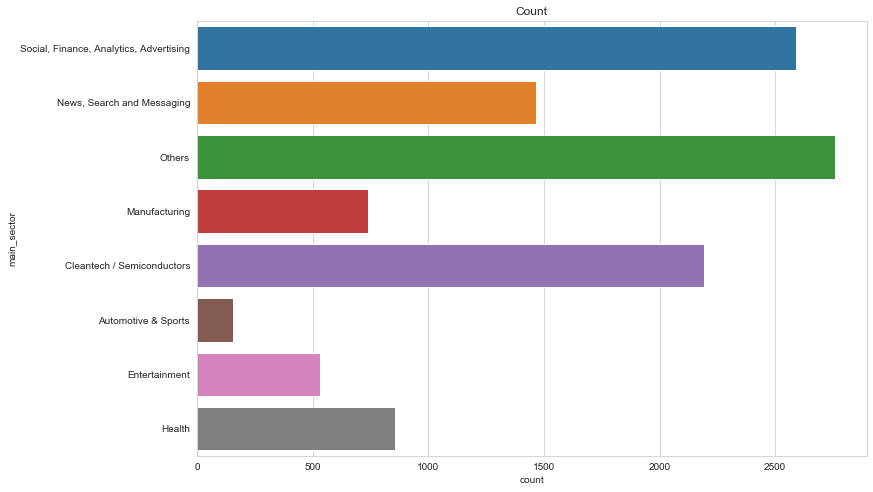

In [79]:
plt.figure(figsize=(12, 8))
sns.countplot(y="main_sector", data=D1)
plt.title("Count")
plt.show()

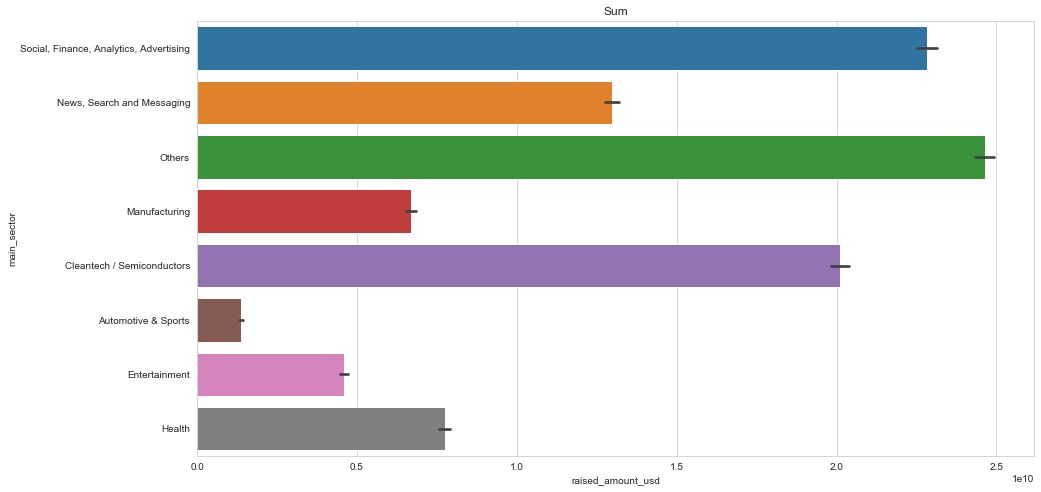

In [80]:
plt.figure(figsize=(15, 8))
sns.barplot(y="main_sector", x="raised_amount_usd", data=D1, estimator=sum)
plt.title("Sum")
plt.show()

**Sector Analysis for GBR using dataframe D2**

In [81]:
D2['raised_amount_usd'].describe()

count    5.820000e+02
mean     8.682635e+06
std      2.863032e+06
min      5.000000e+06
25%      6.100000e+06
50%      8.000000e+06
75%      1.071513e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

***Total amount of investment (USD) in GBR***

In [82]:
D2['raised_amount_usd'].sum()

5053293406.0

In [83]:
D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,16,1.670516e+08
Cleantech / Semiconductors,116,1.048294e+09
Entertainment,53,4.635147e+08
Health,23,2.025375e+08
Manufacturing,40,3.433243e+08
"News, Search and Messaging",66,5.585007e+08
Others,140,1.215442e+09
"Social, Finance, Analytics, Advertising",128,1.054628e+09


***Top 3 Sector name (no. of investment-wise) in GBR***

In [84]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     140
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 116
News, Search and Messaging                  66
Entertainment                               53
Manufacturing                               40
Health                                      23
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

***In top sector count-wise, below company received the highest investment in GBR***

In [85]:
D2[D2['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/electric-cloud             37000000.0
/organization/sensage                    36250000.0
/organization/silverrail-technologies    29000000.0
/organization/opencloud                  27972766.0
/organization/myoptique-group            27694613.0
Name: raised_amount_usd, dtype: float64

***In second best sector count-wise, below company received the highest investment in GBR***

In [86]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/celltick-technologies    37500000.0
/organization/mythings                 34000000.0
/organization/zopa                     32900000.0
/organization/imagini                  28550000.0
/organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

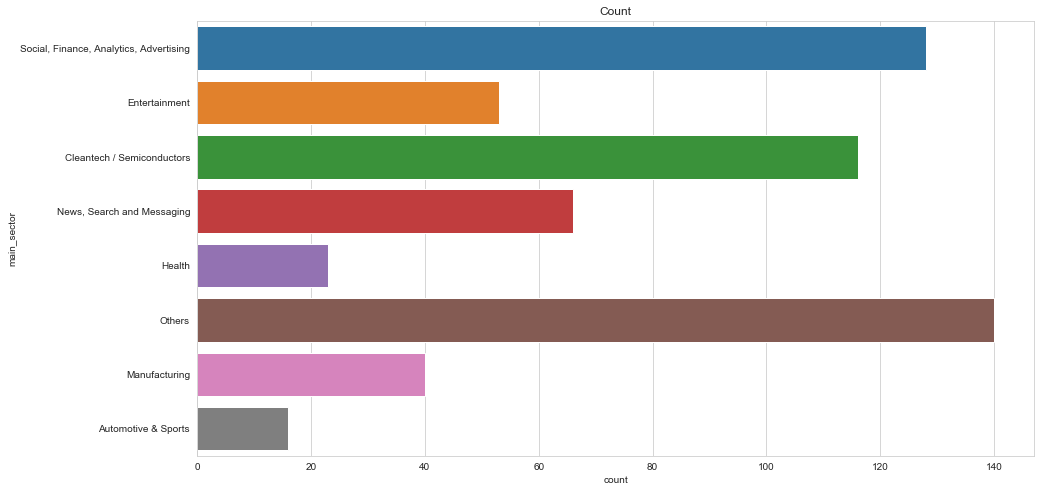

In [87]:
plt.figure(figsize=(15, 8))
sns.countplot(y="main_sector", data=D2)
plt.title("Count")
plt.show()

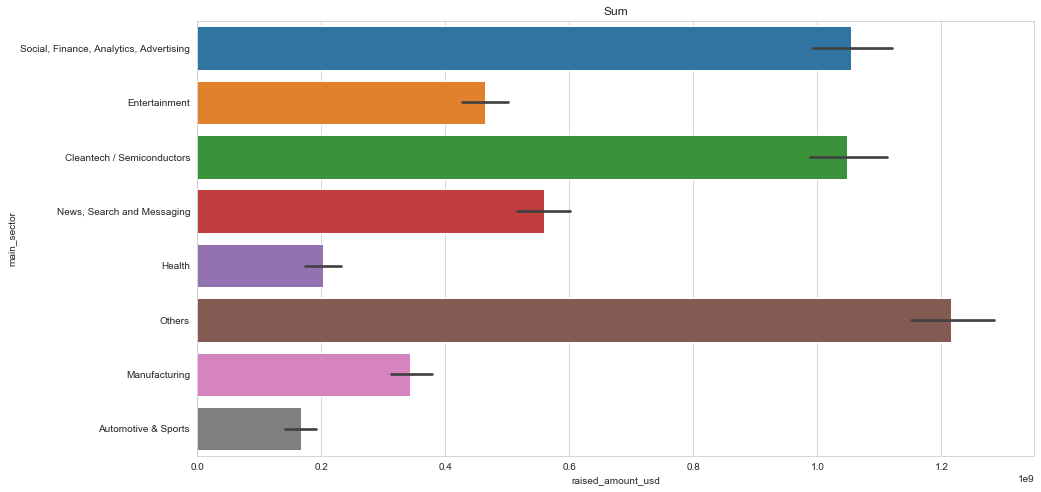

In [88]:
plt.figure(figsize=(15, 8))
sns.barplot(y="main_sector", x="raised_amount_usd", data=D2, estimator=sum)
plt.title("Sum")
plt.show()

**Sector Analysis for IND using dataframe D3**

In [89]:
D3['raised_amount_usd'].describe()

count    3.150000e+02
mean     8.954519e+06
std      3.225977e+06
min      5.000000e+06
25%      6.000000e+06
50%      8.620000e+06
75%      1.062000e+07
max      1.500000e+07
Name: raised_amount_usd, dtype: float64

***Total amount of investment (USD) in IND***

In [90]:
D3['raised_amount_usd'].sum()

2820673602.0

In [91]:
D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,13,136900000.0
Cleantech / Semiconductors,20,165380000.0
Entertainment,32,272080000.0
Health,18,160740000.0
Manufacturing,21,200900000.0
"News, Search and Messaging",49,408834545.0
Others,103,940289507.0
"Social, Finance, Analytics, Advertising",59,535549550.0


***Top 3 Sector name (no. of investment-wise) in IND***

In [92]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     103
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  49
Entertainment                               32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      18
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

***In top sector count-wise, below company received the highest investment in GBR***

In [93]:
D3[D3['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/firstcry-com        39000000.0
/organization/myntra              38000000.0
/organization/commonfloor         32900000.0
/organization/pepperfry-com       28000000.0
/organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

***In second best sector count-wise, below company received the highest investment in IND***

In [94]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

permalink
/organization/manthan-systems               50700000.0
/organization/komli-media                   28000000.0
/organization/shopclues-com                 25000000.0
/organization/intarvo                       21900000.0
/organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

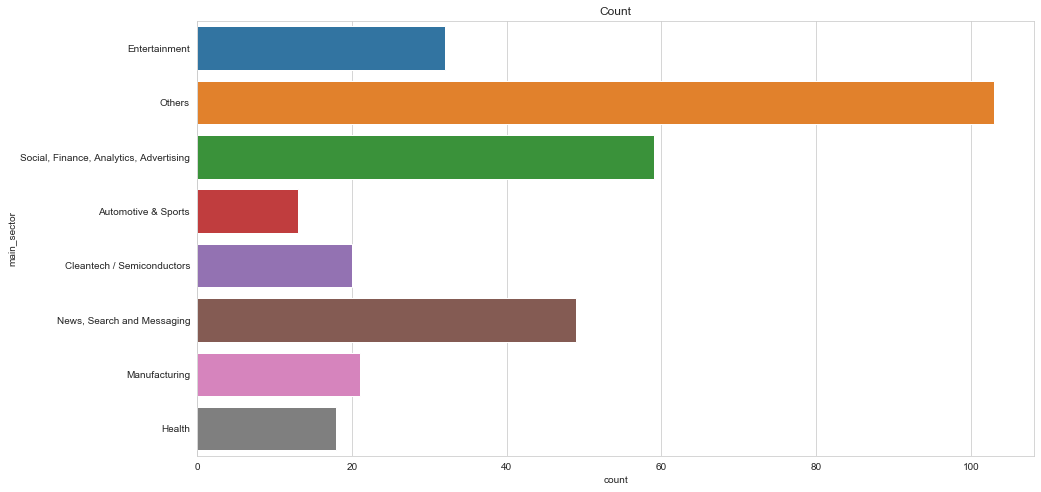

In [95]:
plt.figure(figsize=(15,8))
sns.countplot(y='main_sector',data=D3)
plt.title('Count')
plt.show()

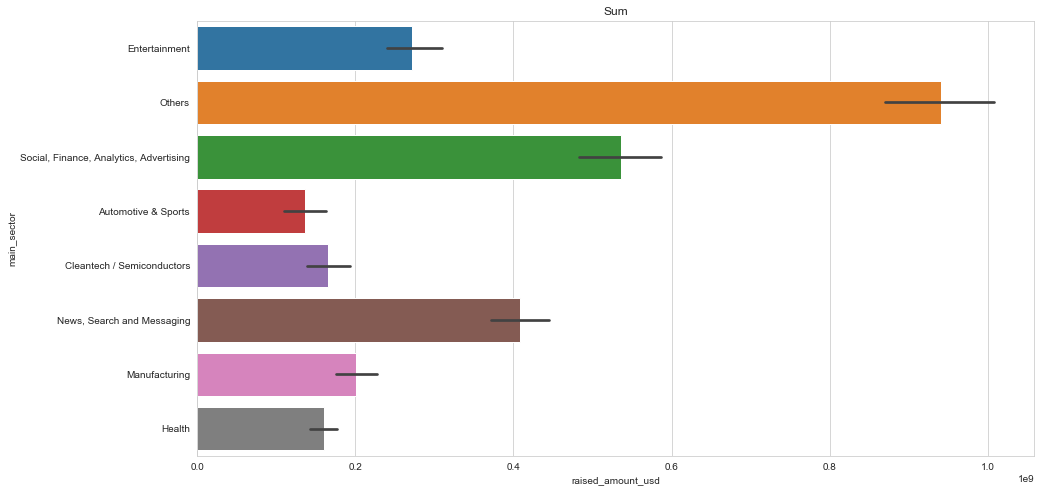

In [96]:
plt.figure(figsize=(15,8))
sns.barplot(y='main_sector',x='raised_amount_usd',data=D3,estimator=sum)
plt.title('Sum')
plt.show()

In [97]:
#Top three main sectors in USA
D1 = D1[D1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D1

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
16,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,service providers,Others
28,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,/organization/170-systems,170 Systems,Software,acquired,USA,MA,Boston,Bedford,software,Others
30,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5000000.0,/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,education,Others
31,/organization/17zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,education,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36295,/organization/zynga,/funding-round/8411431b5a0389a874e3fae93016c089,venture,24-04-2010,15000000.0,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,facebook applications,"Social, Finance, Analytics, Advertising"
36298,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,12-02-2008,5026000.0,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,facebook applications,"Social, Finance, Analytics, Advertising"
36302,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors
36303,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,biotechnology,Cleantech / Semiconductors


In [98]:
#Top three main sectors in GBR
D2 = D2[D2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D2

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
104,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,android,"Social, Finance, Analytics, Advertising"
294,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,18-05-2015,8259067.0,/organization/abcodia,Abcodia,Biotechnology,operating,GBR,H9,London,London,biotechnology,Cleantech / Semiconductors
369,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,31-03-2011,10000000.0,/organization/acacia-pharma,Acacia Pharma,Biotechnology,operating,GBR,C3,London,Cambridge,biotechnology,Cleantech / Semiconductors
381,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,15-06-2011,9910333.0,/organization/acal-energy,ACAL Energy,Clean Technology,operating,GBR,C5,Runcorn,Runcorn,clean technology,Cleantech / Semiconductors
384,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,10720178.0,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,Information Technology,operating,GBR,J8,Nottingham,Nottingham,information technology,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36186,/organization/zoopla,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,/organization/zoopla,Zoopla,Property Management|Real Estate,ipo,GBR,H9,London,London,property management,"Social, Finance, Analytics, Advertising"
36200,/organization/zopa,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,H9,London,London,finance,"Social, Finance, Analytics, Advertising"
36201,/organization/zopa,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,H9,London,London,finance,"Social, Finance, Analytics, Advertising"
36202,/organization/zopa,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,H9,London,London,finance,"Social, Finance, Analytics, Advertising"


In [99]:
#Top three main sectors in IND
D3 = D3[D3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D3

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
52,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,10,New Delhi,Gurgaon,e-commerce,Others
266,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,Finance,operating,IND,16,Mumbai,Mumbai,finance,"Social, Finance, Analytics, Advertising"
1205,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,/organization/agile,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,finance,"Social, Finance, Analytics, Advertising"
1450,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,01-07-2014,5000000.0,/organization/akosha,Akosha,Consumer Internet|Digital Media|Enterprise Sof...,operating,IND,7,New Delhi,New Delhi,consumer internet,"Social, Finance, Analytics, Advertising"
1812,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,5500000.0,/organization/amagi-media-labs,Amagi Media Labs,Advertising,operating,IND,19,Bangalore,Bangalore,advertising,"Social, Finance, Analytics, Advertising"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34494,/organization/vriti-infocom,/funding-round/67aac706a82108fc0f6068901b6293e2,venture,25-08-2010,5000000.0,/organization/vriti-infocom,Vriti Infocom,Education,operating,IND,36,New Delhi,Noida,education,Others
34502,/organization/vserv,/funding-round/6442af712aaab254abcae2fe3fea9bc9,venture,02-03-2015,11000000.0,/organization/vserv,Vserv,Emerging Markets|Mobile Advertising|Mobile Com...,operating,IND,16,Mumbai,Mumbai,emerging markets,Others
34549,/organization/vyome-biosciences,/funding-round/339647785b60e71ab176256b8a062774,venture,12-08-2014,8000000.0,/organization/vyome-biosciences,Vyome Biosciences,Biotechnology|Life Sciences,operating,IND,7,Delhi,Delhi,biotechnology,Cleantech / Semiconductors
35664,/organization/yepme-com,/funding-round/cf179033074390a33c0b1cdc3a9f14b9,venture,09-01-2015,12700000.0,/organization/yepme-com,yepme.com,Brand Marketing|Online Shopping|Product Design,operating,IND,10,New Delhi,Gurgaon,brand marketing,"Social, Finance, Analytics, Advertising"


In [100]:
# concatinating D1, D2 and D3
top3 = pd.concat([D1, D2, D3], axis = 0, ignore_index = True, sort = False)

In [101]:
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
1,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,service providers,Others
2,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14000000.0,/organization/170-systems,170 Systems,Software,acquired,USA,MA,Boston,Bedford,software,Others
3,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5000000.0,/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,education,Others
4,/organization/17zuoye,/funding-round/8d87f771e938e0f31641bd600abbafca,venture,01-09-2013,10000000.0,/organization/17zuoye,17zuoye,Education|Language Learning,operating,USA,VA,VA - Other,Shanghai,education,Others


## Expected Result  : 

**1.Plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.**

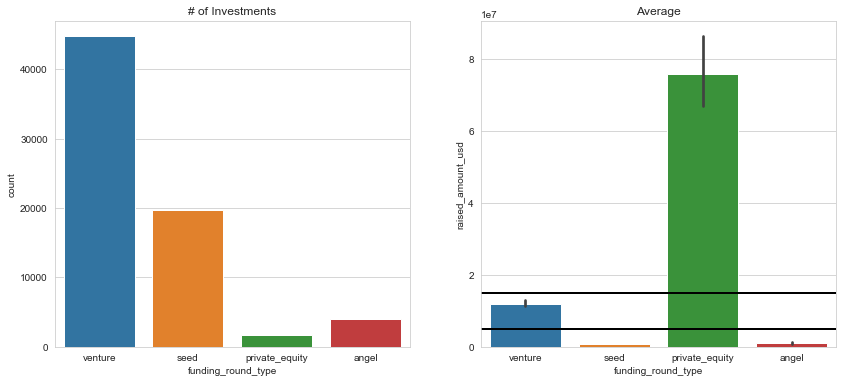

In [102]:
# Average and number of ivestments across different funding type angel, venture, seed, and private equity

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average")
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

<font color = magenta >**Based on above plot 'venture' fund type is best suited for investment for Spark Funds as many investors are investing in this and it falls between 5 million to 15 million USD.**</font>

**2.Plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.**


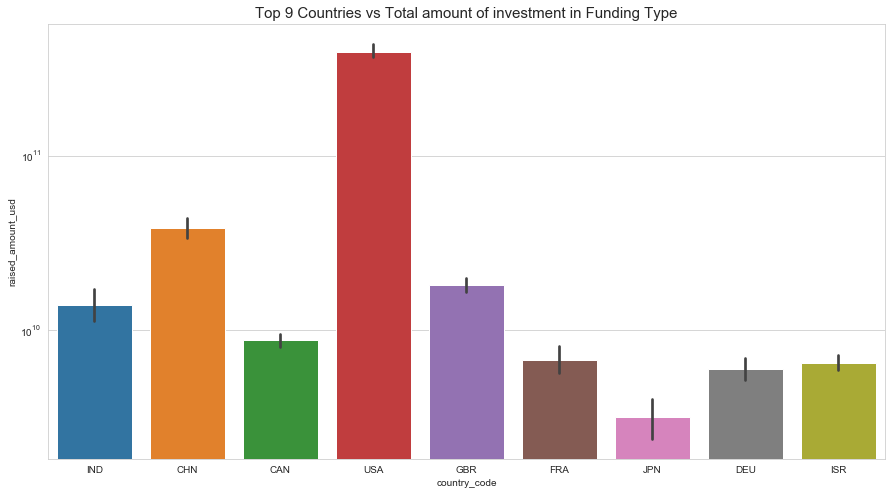

In [103]:
plt.figure(figsize=(15,8))
sns.barplot(x='country_code',y='raised_amount_usd',data=top9,estimator=np.sum)
plt.yscale("log")
plt.title("Top 9 Countries vs Total amount of investment in Funding Type", fontsize=15)
plt.show()

<font color = magenta>**Based on above plot we can tell that USA , GBR  and IND are the top 3 english speaking counteris where
    Spark Funds can invest.**</font>

**3.Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).**

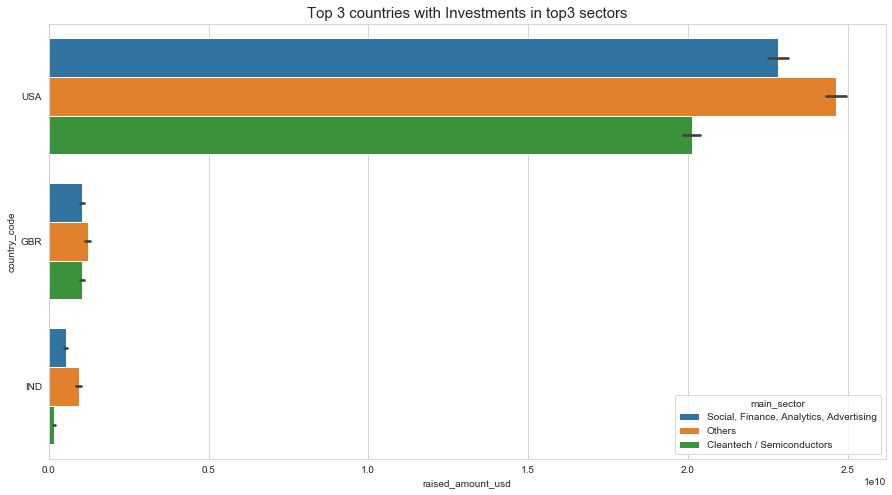

In [104]:
plt.figure(figsize=(15, 8))
sns.barplot( x='raised_amount_usd',y='country_code', hue="main_sector", data=top3, estimator=np.sum)
plt.title('Top 3 countries with Investments in top3 sectors',fontsize =15)
plt.show()

<font color = magenta>**Based on above plot we can decide top 3 sectors in top 3 english speaking countries for investment.**</font>